In [116]:
import fastf1 as f1 # f1 data library
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [3]:
event_schedule = f1.get_event_schedule(2024)

event_schedule[event_schedule.Session1DateUtc < np.datetime64(pd.Timestamp('today', tz='UTC'))]

C:\Users\kevin.sweitzer\AppData\Local\Temp\ipykernel_4884\2537379734.py:3: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  event_schedule[event_schedule.Session1DateUtc < np.datetime64(pd.Timestamp('today', tz='UTC'))]


,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2024,2024-02-23,Pre-Season Testing,testing,Practice 1,2024-02-21 10:00:00+03:00,2024-02-21 07:00:00,...,Practice 3,2024-02-23 10:00:00+03:00,2024-02-23 07:00:00,None,NaT,NaT,None,NaT,NaT,True
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2024,2024-03-02,Bahrain Grand Prix,conventional,Practice 1,2024-02-29 14:30:00+03:00,2024-02-29 11:30:00,...,Practice 3,2024-03-01 15:30:00+03:00,2024-03-01 12:30:00,Qualifying,2024-03-01 19:00:00+03:00,2024-03-01 16:00:00,Race,2024-03-02 18:00:00+03:00,2024-03-02 15:00:00,True
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2024,2024-03-09,Saudi Arabian Grand Prix,conventional,Practice 1,2024-03-07 16:30:00+03:00,2024-03-07 13:30:00,...,Practice 3,2024-03-08 16:30:00+03:00,2024-03-08 13:30:00,Qualifying,2024-03-08 20:00:00+03:00,2024-03-08 17:00:00,Race,2024-03-09 20:00:00+03:00,2024-03-09 17:00:00,True
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2024,2024-03-24,Australian Grand Prix,conventional,Practice 1,2024-03-22 12:30:00+11:00,2024-03-22 01:30:00,...,Practice 3,2024-03-23 12:30:00+11:00,2024-03-23 01:30:00,Qualifying,2024-03-23 16:00:00+11:00,2024-03-23 05:00:00,Race,2024-03-24 15:00:00+11:00,2024-03-24 04:00:00,True
4,4,Japan,Suzuka,FORMULA 1 MSC CRUISES JAPANESE GRAND PRIX 2024,2024-04-07,Japanese Grand Prix,conventional,Practice 1,2024-04-05 11:30:00+09:00,2024-04-05 02:30:00,...,Practice 3,2024-04-06 11:30:00+09:00,2024-04-06 02:30:00,Qualifying,2024-04-06 15:00:00+09:00,2024-04-06 06:00:00,Race,2024-04-07 14:00:00+09:00,2024-04-07 05:00:00,True
5,5,China,Shanghai,FORMULA 1 LENOVO CHINESE GRAND PRIX 2024,2024-04-21,Chinese Grand Prix,sprint_qualifying,Practice 1,2024-04-19 11:30:00+08:00,2024-04-19 03:30:00,...,Sprint,2024-04-20 11:00:00+08:00,2024-04-20 03:00:00,Qualifying,2024-04-20 15:00:00+08:00,2024-04-20 07:00:00,Race,2024-04-21 15:00:00+08:00,2024-04-21 07:00:00,True
6,6,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2024,2024-05-05,Miami Grand Prix,sprint_qualifying,Practice 1,2024-05-03 12:30:00-04:00,2024-05-03 16:30:00,...,Sprint,2024-05-04 12:00:00-04:00,2024-05-04 16:00:00,Qualifying,2024-05-04 16:00:00-04:00,2024-05-04 20:00:00,Race,2024-05-05 16:00:00-04:00,2024-05-05 20:00:00,True
7,7,Italy,Imola,FORMULA 1 MSC CRUISES GRAN PREMIO DEL MADE IN ...,2024-05-19,Emilia Romagna Grand Prix,conventional,Practice 1,2024-05-17 13:30:00+02:00,2024-05-17 11:30:00,...,Practice 3,2024-05-18 12:30:00+02:00,2024-05-18 10:30:00,Qualifying,2024-05-18 16:00:00+02:00,2024-05-18 14:00:00,Race,2024-05-19 15:00:00+02:00,2024-05-19 13:00:00,True
8,8,Monaco,Monaco,FORMULA 1 GRAND PRIX DE MONACO 2024,2024-05-26,Monaco Grand Prix,conventional,Practice 1,2024-05-24 13:30:00+02:00,2024-05-24 11:30:00,...,Practice 3,2024-05-25 12:30:00+02:00,2024-05-25 10:30:00,Qualifying,2024-05-25 16:00:00+02:00,2024-05-25 14:00:00,Race,2024-05-26 15:00:00+02:00,2024-05-26 13:00:00,True
9,9,Canada,Montréal,FORMULA 1 AWS GRAND PRIX DU CANADA 2024,2024-06-09,Canadian Grand Prix,conventional,Practice 1,2024-06-07 13:30:00-04:00,2024-06-07 17:30:00,...,Practice 3,2024-06-08 12:30:00-04:00,2024-06-08 16:30:00,Qualifying,2024-06-08 16:00:00-04:00,2024-06-08 20:00:00,Race,2024-06-09 14:00:00-04:00,2024-06-09 18:00:00,True


In [132]:
practice_sessions = {"FP1": f1.get_session(2024, 16, 'FP1'), "FP2":f1.get_session(2024, 16, 'FP2'), "FP3":f1.get_session(2024, 16, 'FP3')}

race_session = f1.get_session(2024, 16, 'R')

for session in practice_sessions:
    practice_sessions[session].load(telemetry=False, weather=False, messages=False)
    print(f"{session} finished loading")
    
race_session.load()

core           INFO 	Loading data for Italian Grand Prix - Practice 1 [v3.3.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 63
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 63)
core           INFO 	Finished loading data for 21 drivers: ['1', '10', '11', '12', '14', '16', '18', '20', '22', '23', '24', '27', '3', '31', '4', '43', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Italian Grand Prix - Practice 2 [v3.3.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for drive

FP1 finished loading


core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '3', '31', '4', '43', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Italian Grand Prix - Practice 3 [v3.3.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


FP2 finished loading


core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '3', '31', '4', '43', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Italian Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


FP3 finished loading


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

In [94]:
# from last notebook. will be making a module data type soon

class Stint:
    def __init__(self, session_type, laps):
        self.laps_df = laps
        self.session_type = session_type
        self.driver = self.laps_df['Driver'].unique()[0]
        self.stint = self.laps_df['Stint'].unique()[0]
        self.fresh_tire = self.laps_df["FreshTyre"].unique()[0]
        self.tire = self.laps_df["Compound"].unique()[0]
        self.num_laps = self.laps_df.shape[0]
        self.fastest_lap = self.laps_df['LapTime'].min()
        self.avg_lap_time = np.mean(self.laps_df['LapTime'])
        self.quick_laps_df = self.laps_df.pick_quicklaps()

In [95]:
# from last notebook will be making a factory class to do this maybe. idk yet but its in the back of my mind

def sort_func(e):
    return e[-1]

# I want to find the fastest stints
stints = []
stints_obj_dict_by_driver = {}
for session_name in practice_sessions:
    print(f"Analyzing {session_name}")
    session_laps = practice_sessions[session_name].laps.dropna(subset=['LapTime'])
    drivers = session_laps.Driver.unique()
    for driver in drivers:
        driver_session_laps = session_laps.pick_driver(driver).pick_wo_box()
        driver_stints = driver_session_laps.Stint.unique()
        for stint in driver_stints:
            driver_stint_laps = driver_session_laps[driver_session_laps['Stint'] == stint]
            fastest_stint_lap = driver_stint_laps['LapTime'].min()
            if not pd.isnull(np.mean(driver_stint_laps['LapTime'])):
                if driver in stints_obj_dict_by_driver:
                    stints_obj_dict_by_driver[driver].append(Stint(session_name, driver_stint_laps))
                else:
                    stints_obj_dict_by_driver[driver] = [Stint(session_name, driver_stint_laps)]
                stint_data = [session_name, driver, stint, driver_stint_laps["FreshTyre"].unique()[0], driver_stint_laps["Compound"].unique()[0], len(driver_stint_laps), fastest_stint_lap, np.mean(driver_stint_laps['LapTime'])]
                stints.append(stint_data)
                
stints.sort(key=sort_func)
df = pd.DataFrame(stints, columns=['Session', 'Driver', 'Stint', 'FreshTyre', 'Tire', 'Number of Laps', 'Fastest Lap', 'Avg LapTime'])

display_df = df[df["Driver"] == "HAM"]

display_df

Analyzing FP1
Analyzing FP2
Analyzing FP3


,Session,Driver,Stint,FreshTyre,Tire,Number of Laps,Fastest Lap,Avg LapTime
0,FP3,HAM,4.0,True,SOFT,1,0 days 00:01:20.117000,0 days 00:01:20.117000
8,FP3,HAM,5.0,False,SOFT,1,0 days 00:01:20.514000,0 days 00:01:20.514000
13,FP2,HAM,3.0,False,SOFT,1,0 days 00:01:20.738000,0 days 00:01:20.738000
16,FP3,HAM,2.0,False,MEDIUM,1,0 days 00:01:20.766000,0 days 00:01:20.766000
37,FP2,HAM,2.0,True,SOFT,1,0 days 00:01:21.168000,0 days 00:01:21.168000
51,FP3,HAM,1.0,True,MEDIUM,1,0 days 00:01:21.545000,0 days 00:01:21.545000
57,FP2,HAM,1.0,True,MEDIUM,1,0 days 00:01:21.641000,0 days 00:01:21.641000
119,FP1,HAM,1.0,True,SOFT,2,0 days 00:01:23.350000,0 days 00:01:24.418500
128,FP1,HAM,3.0,False,SOFT,3,0 days 00:01:25.660000,0 days 00:01:26.074666666
148,FP2,HAM,5.0,False,MEDIUM,12,0 days 00:01:24.110000,0 days 00:01:30.987666666


In [106]:
# selecting stints with a lot of laps (race simulating stints)

goat_stints = [stint for stint in stints_obj_dict_by_driver["HAM"] if stint.num_laps > 3]

print("Selected HAM stints")
print("NUM LAPS\tTIRE\t\tFASTEST LAP\t\t\t\tAVG LAP TIME")
for stint in goat_stints:
    print(f"{stint.num_laps}\t\t\t{stint.tire}\t\t{stint.fastest_lap}\t{stint.avg_lap_time}\t\t{len(stint.quick_laps_df)}")

Selected HAM stints
NUM LAPS	TIRE		FASTEST LAP				AVG LAP TIME
4			SOFT		0 days 00:01:22.214000	0 days 00:01:47.879500		2
4			SOFT		0 days 00:01:25.783000	0 days 00:01:41.111250		3
12			MEDIUM		0 days 00:01:24.110000	0 days 00:01:30.987666666		11


In [130]:
# do the actual regressions
# i am having trouble deciding whether i should use the quick_laps_df or laps_df
stint_regressions_laps_df = []
stint_regressions_quick_laps_df = []
for stint in goat_stints:
    X = []
    y = []
    lap_cnt = 0
    for id, lap in stint.laps_df.iterlaps():
        lap_cnt += 1
        X.append(lap_cnt)
        y.append(lap['LapTime'].total_seconds())
    reg = LinearRegression().fit(np.array(X).reshape(-1,1), np.array(y))
    stint_regressions_laps_df.append([reg.coef_[0], reg.intercept_, reg.score(np.array(X).reshape(-1,1),np.array(y)), X[-1], stint])
    

for stint in goat_stints:
    X = []
    y = []
    lap_cnt = 0
    for id, lap in stint.quick_laps_df.iterlaps():
        lap_cnt += 1
        X.append(lap_cnt)
        y.append(lap['LapTime'].total_seconds())
    reg = LinearRegression().fit(np.array(X).reshape(-1,1), np.array(y))
    stint_regressions_quick_laps_df.append([reg.coef_[0], reg.intercept_, reg.score(np.array(X).reshape(-1,1),np.array(y)), X[-1], stint])

stint_regressions_quick_laps_df

[[-0.6670000000000013, 83.548, 1.0, 2, <__main__.Stint at 0x17127686e70>],
 [0.33950000000000097,
  85.509,
  0.48371971512386747,
  3,
 [-0.12803636363636398,
  86.54849090909092,
  0.1187741382370111,
  11,

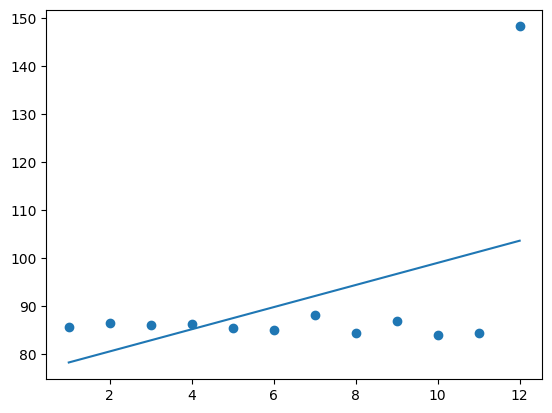

In [127]:
# time to graph!!!!
# i decided to only look at the 12 lap stint because it seemed to be the most accurate
# just looking at the linear regression equation this stint makes the most sense ( > 0 slope + intercept seems pretty close to a "perfect" lap time)

# up first is the all laps df linear regression
main_stint = stint_regressions_laps_df[-1]

fig, ax = plt.subplots()

X = [lap['LapTime'].total_seconds() for id, lap in main_stint[-1].laps_df.iterlaps()]
y = [x+1 for x in range(main_stint[3])]

ax.scatter(y, X)
ax.plot(np.linspace(1, main_stint[3]), main_stint[0]*np.linspace(1, main_stint[3]) + main_stint[1])

Lin Reg Eq: y = -0.12803636363636398 * x + 86.54849090909092


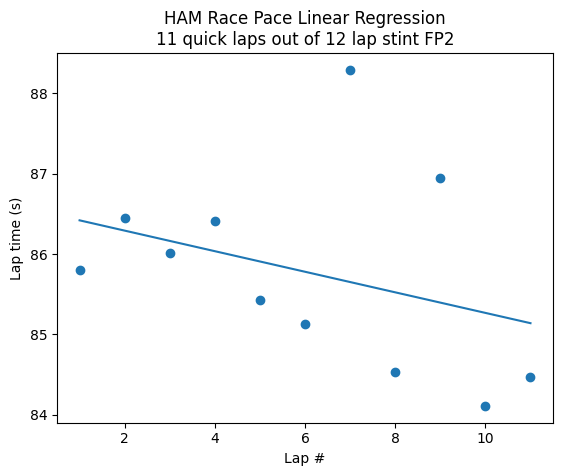

In [154]:
# now the quick laps
main_stint_quick_laps = stint_regressions_quick_laps_df[-1]

fig, ax = plt.subplots()

X = [lap['LapTime'].total_seconds() for id, lap in main_stint_quick_laps[-1].quick_laps_df.iterlaps()]
y = [x+1 for x in range(main_stint_quick_laps[3])]

ax.scatter(y, X)
ax.plot(np.linspace(1, main_stint_quick_laps[3]), main_stint_quick_laps[0]*np.linspace(1, main_stint_quick_laps[3]) + main_stint_quick_laps[1])

ax.set_ylabel("Lap time (s)")
ax.set_xlabel("Lap #")
ax.set_title("HAM Race Pace Linear Regression\n11 quick laps out of 12 lap stint FP2")

print(f"Lin Reg Eq: y = {main_stint_quick_laps[0]} * x + {main_stint_quick_laps[1]}")

In [143]:

print(np.trapz(main_stint_quick_laps[0]*np.linspace(1, main_stint_quick_laps[3]) + main_stint_quick_laps[1], x=np.linspace(1, main_stint_quick_laps[3]))/main_stint_quick_laps[3])

77.98206611570248


In [146]:
# i feel like i have a good enough answer to actually compare with the race data. lets see how close I was

race_laps = race_session.laps.dropna(subset=['LapTime'])

ham_race_laps = race_laps[race_laps['Driver'] == "HAM"]

print(f"avg lap time: {np.mean(ham_race_laps['LapTime'])}")
print(f"fastest lap time: {ham_race_laps['LapTime'].min()}")

ham_race_laps

avg lap time: 0 days 00:01:24.972584905
fastest lap time: 0 days 00:01:21.512000


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
212,0 days 00:57:20.460000,HAM,44,0 days 00:01:29.674000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:30.629000,...,True,Mercedes,0 days 00:55:50.494000,2024-09-01 13:03:34.413,1,5.0,False,,False,False
213,0 days 00:58:46.503000,HAM,44,0 days 00:01:26.043000,2.0,1.0,NaT,NaT,0 days 00:00:27.701000,0 days 00:00:29.754000,...,True,Mercedes,0 days 00:57:20.460000,2024-09-01 13:05:04.379,1,5.0,False,,False,True
214,0 days 01:00:12.133000,HAM,44,0 days 00:01:25.630000,3.0,1.0,NaT,NaT,0 days 00:00:27.495000,0 days 00:00:29.688000,...,True,Mercedes,0 days 00:58:46.503000,2024-09-01 13:06:30.422,1,5.0,False,,False,True
215,0 days 01:01:37.855000,HAM,44,0 days 00:01:25.722000,4.0,1.0,NaT,NaT,0 days 00:00:27.650000,0 days 00:00:29.626000,...,True,Mercedes,0 days 01:00:12.133000,2024-09-01 13:07:56.052,1,5.0,False,,False,True
216,0 days 01:03:02.626000,HAM,44,0 days 00:01:24.771000,5.0,1.0,NaT,NaT,0 days 00:00:27.451000,0 days 00:00:29.134000,...,True,Mercedes,0 days 01:01:37.855000,2024-09-01 13:09:21.774,1,5.0,False,,False,True
217,0 days 01:04:27.545000,HAM,44,0 days 00:01:24.919000,6.0,1.0,NaT,NaT,0 days 00:00:27.565000,0 days 00:00:29.213000,...,True,Mercedes,0 days 01:03:02.626000,2024-09-01 13:10:46.545,1,5.0,False,,False,True
218,0 days 01:05:52.750000,HAM,44,0 days 00:01:25.205000,7.0,1.0,NaT,NaT,0 days 00:00:27.635000,0 days 00:00:29.267000,...,True,Mercedes,0 days 01:04:27.545000,2024-09-01 13:12:11.464,1,5.0,False,,False,True
219,0 days 01:07:17.621000,HAM,44,0 days 00:01:24.871000,8.0,1.0,NaT,NaT,0 days 00:00:27.605000,0 days 00:00:28.975000,...,True,Mercedes,0 days 01:05:52.750000,2024-09-01 13:13:36.669,1,5.0,False,,False,True
220,0 days 01:08:42.656000,HAM,44,0 days 00:01:25.035000,9.0,1.0,NaT,NaT,0 days 00:00:27.790000,0 days 00:00:29.067000,...,True,Mercedes,0 days 01:07:17.621000,2024-09-01 13:15:01.540,1,5.0,False,,False,True
221,0 days 01:10:07.565000,HAM,44,0 days 00:01:24.909000,10.0,1.0,NaT,NaT,0 days 00:00:27.537000,0 days 00:00:29.196000,...,True,Mercedes,0 days 01:08:42.656000,2024-09-01 13:16:26.575,1,5.0,False,,False,True


My linear regression model for ham seems pretty accurate. I am now able to sorta predict the pace of the driver throughout the race a long with the impacts of tire deg / fuel consumption to the car. Issue is, there is still a lot of human actions needed for this analysis to work. I first need to look at each driver's stints and pick out stint/s that can accurately predict the driver/car combo's race pace. This is going to require a massive nb for me to go through, but we will tackle that when the time comes. Might start working on full season nb that will update as the season progresses. not sure yet but we will see.